In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.rc('font', family='AppleGothic')  # macOS 기본 한글 지원 폰트
mpl.rcParams['axes.unicode_minus'] = False

In [29]:
data = pd.read_csv('nightlife_crime.csv')
data.head()

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
0,강남,283,354,637,0,6,19,140,176,3,21,310,2484,2604
1,강동,146,106,252,0,3,6,193,158,4,6,156,2366,2712
2,강북,79,128,207,0,0,9,166,210,7,14,153,1434,2649
3,강서,113,167,280,0,3,9,273,240,7,13,262,2096,3207
4,관악,223,99,322,0,2,14,170,209,9,12,320,2706,3298


## 산점도

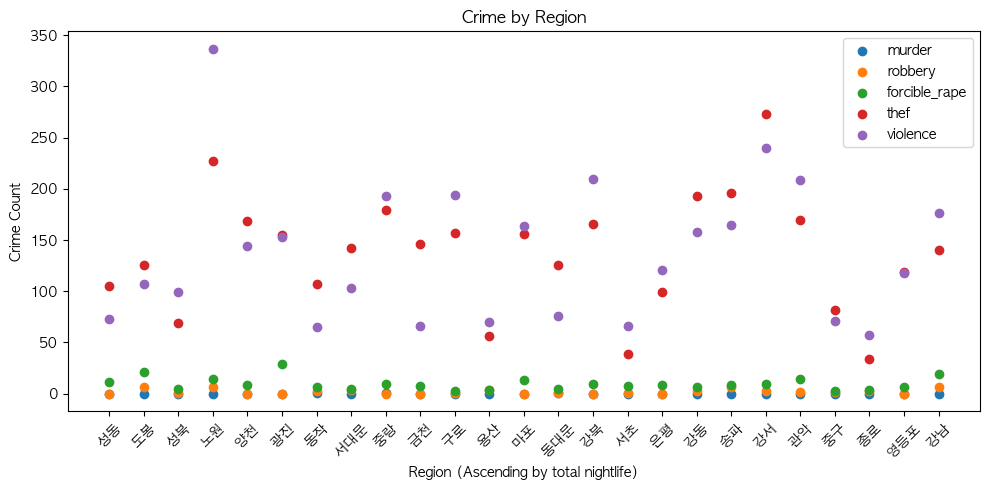

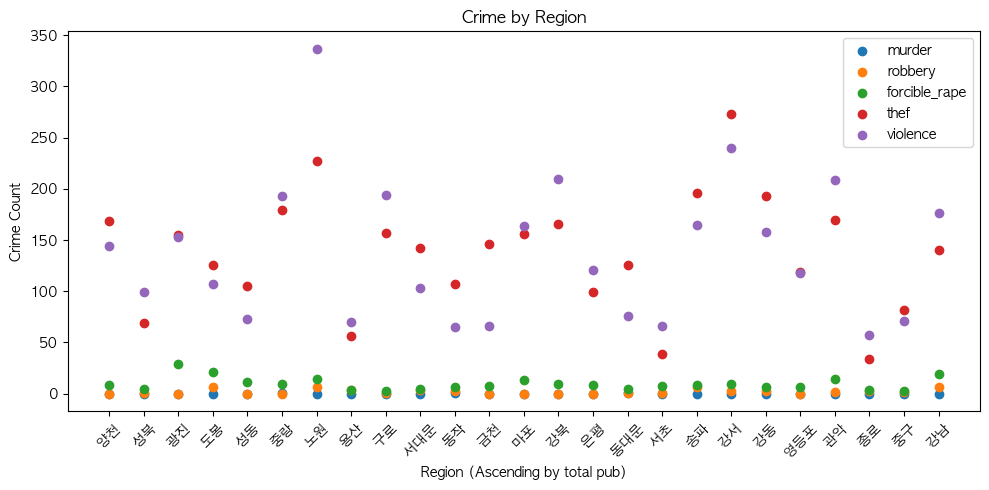

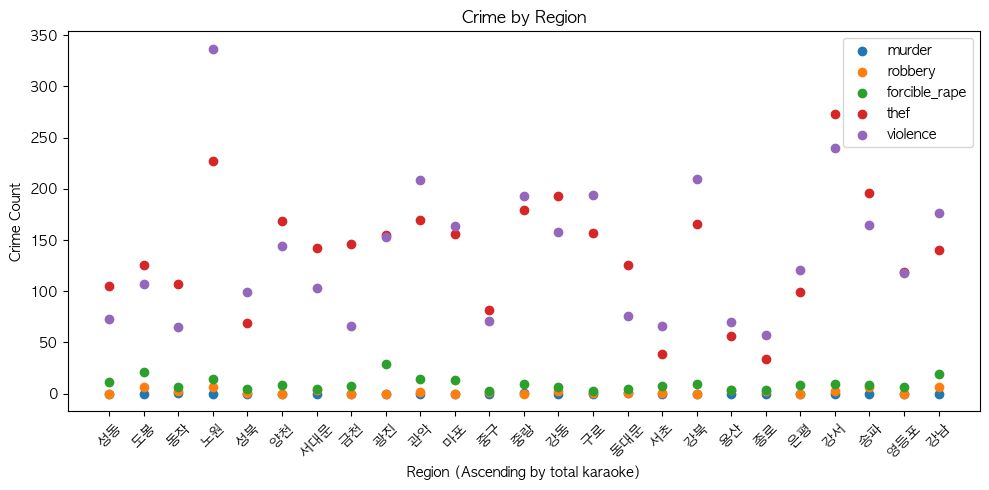

In [58]:
# 산점도

# 유흥업소 점포수 오름차순으로 지역 정렬, 산점도
sort = data.sort_values(by='tot_nightlife',ascending=True)

plt.figure(figsize=(10, 5))
plt.scatter(sort['region'], sort['murder'], label='murder')
plt.scatter(sort['region'], sort['robbery'], label='robbery')
plt.scatter(sort['region'], sort['forcible_rape'], label='forcible_rape')
plt.scatter(sort['region'], sort['thef'], label='thef')
plt.scatter(sort['region'], sort['violence'], label='violence')
plt.scatter
plt.xticks(rotation=45)
plt.xlabel('Region (Ascending by total nightlife)')
plt.ylabel('Crime Count')
plt.title('Crime by Region')
plt.tight_layout()
plt.legend()
plt.savefig('image/figure01.png')
plt.show()

# pub 점포수 오름차순으로 지역 정렬, 산점도
sort = data.sort_values(by='pub',ascending=True)

plt.figure(figsize=(10, 5))
plt.scatter(sort['region'], sort['murder'], label='murder')
plt.scatter(sort['region'], sort['robbery'], label='robbery')
plt.scatter(sort['region'], sort['forcible_rape'], label='forcible_rape')
plt.scatter(sort['region'], sort['thef'], label='thef')
plt.scatter(sort['region'], sort['violence'], label='violence')
plt.scatter
plt.xticks(rotation=45)
plt.xlabel('Region (Ascending by total pub)')
plt.ylabel('Crime Count')
plt.title('Crime by Region')
plt.tight_layout()
plt.legend()
plt.savefig('image/figure02.png')
plt.show()

# karaoke 점포수 오름차순으로 지역 정렬, 산점도

sort = data.sort_values(by='karaoke',ascending=True)

plt.figure(figsize=(10, 5))
plt.scatter(sort['region'], sort['murder'], label='murder')
plt.scatter(sort['region'], sort['robbery'], label='robbery')
plt.scatter(sort['region'], sort['forcible_rape'], label='forcible_rape')
plt.scatter(sort['region'], sort['thef'], label='thef')
plt.scatter(sort['region'], sort['violence'], label='violence')
plt.scatter
plt.xticks(rotation=45)
plt.xlabel('Region (Ascending by total karaoke)')
plt.ylabel('Crime Count')
plt.title('Crime by Region')
plt.tight_layout()
plt.legend()
plt.savefig('image/figure03.png')
plt.show()


> 점포수 별로 범죄율 증가 안하는 것 같은데...?

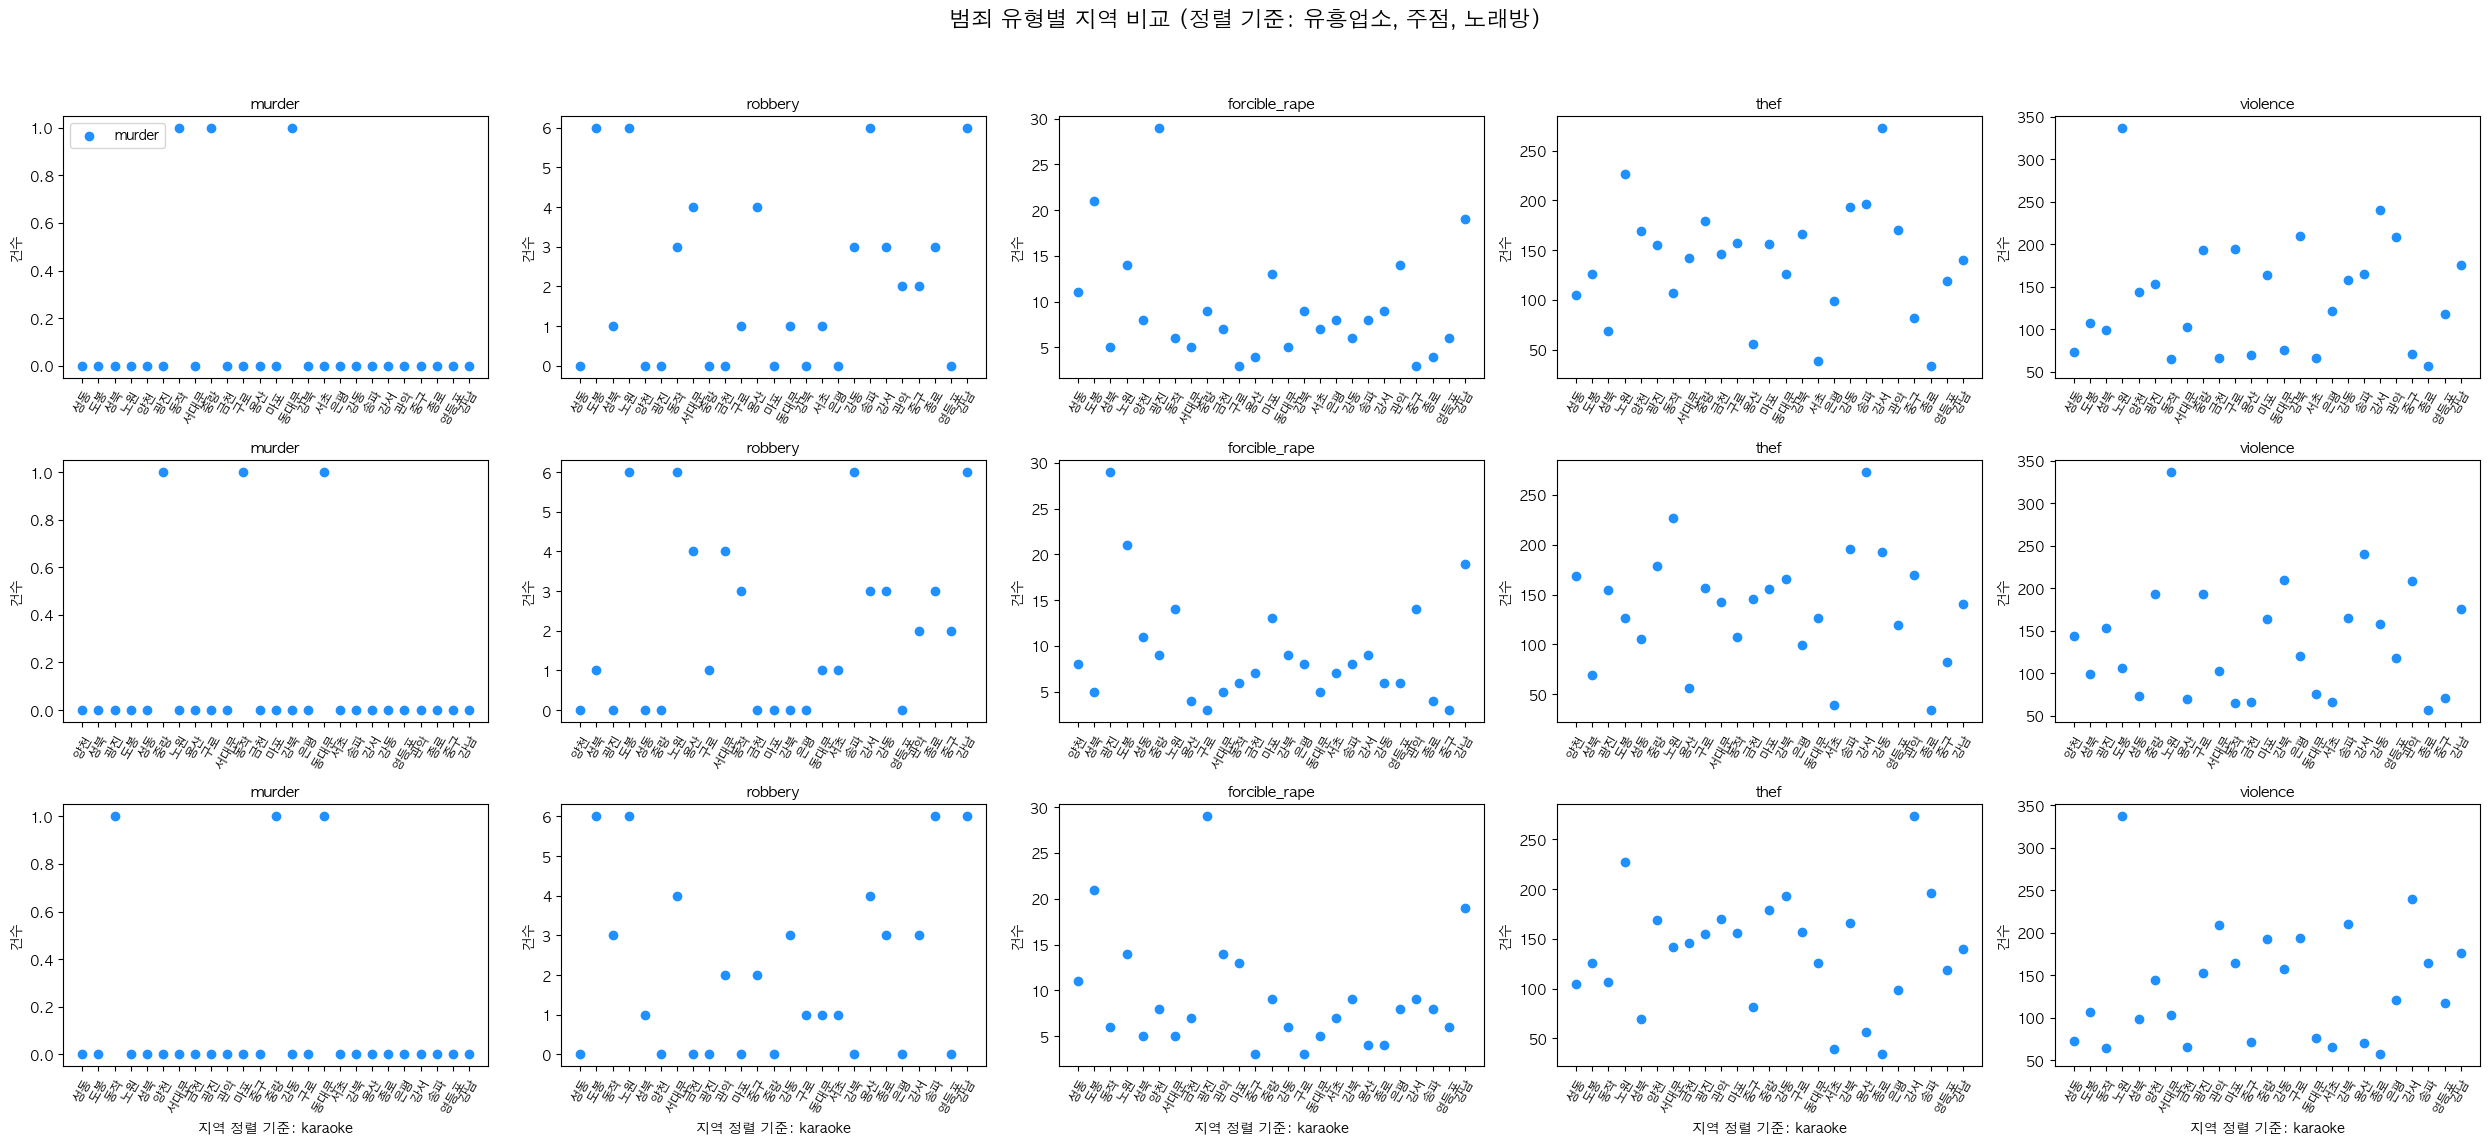

In [57]:
# 정렬 기준과 컬럼 이름
sort_keys = ['tot_nightlife', 'pub', 'karaoke']
crime_cols = ['murder', 'robbery', 'forcible_rape', 'thef', 'violence']

# 서브플롯 생성 (3행 x 5열)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 12))
fig.suptitle('범죄 유형별 지역 비교 (정렬 기준: 유흥업소, 주점, 노래방)', fontsize=16)
plt.subplots_adjust(hspace=0.4)

# 반복해서 각 그래프 그리기
for i, sort_key in enumerate(sort_keys):
    sorted_data = data.sort_values(by=sort_key, ascending=True)
    for j, crime in enumerate(crime_cols):
        ax = axes[i, j]
        ax.scatter(sorted_data['region'], sorted_data[crime], color='dodgerblue', label=crime)
        ax.set_title(f"{crime}", fontsize=11)
        ax.set_xticks(range(len(sorted_data['region'])))
        ax.set_xticklabels(sorted_data['region'], rotation=60, fontsize=9)
        ax.set_ylabel('건수')
        if i == 2:  # 마지막 행만 x축 라벨
            ax.set_xlabel(f"지역 정렬 기준: {sort_key}")

# 범례는 하나만 따로
axes[0, 0].legend(loc='upper left')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목 영역 확보
plt.savefig('image/figure04.png')
plt.show()


In [62]:
# 예시 데이터프레임

crime_tot_sum = df.iloc[:, -3:].sum(axis=1)
print(crime_tot_sum)

# # 1, 2, 3열(즉, 인덱스 0, 1, 2)의 행별 합 계산
# row_sum = df.iloc[:, [0, 1, 2]].sum(axis=1)

# print(row_sum)


# sort = data.sort_values(by='murder_tot',ascending=True)

# # 정렬 기준과 컬럼 이름
# sort_keys = ['murder_tot', 'robbery_tot', 'forcible_rape_tot', 'thef_tot', 'violence_tot']
# crime_cols = ['murder', 'robbery', 'forcible_rape', 'thef', 'violence']

# # 서브플롯 생성 (3행 x 5열)
# fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 12))
# fig.suptitle('범죄 유형별 지역 비교 (정렬 기준: 살인, 주점, 노래방)', fontsize=16)
# plt.subplots_adjust(hspace=0.4)

# # 반복해서 각 그래프 그리기
# for i, sort_key in enumerate(sort_keys):
#     sorted_data = data.sort_values(by=sort_key, ascending=True)
#     for j, crime in enumerate(crime_cols):
#         ax = axes[i, j]
#         ax.scatter(sorted_data['region'], sorted_data[crime], color='dodgerblue', label=crime)
#         ax.set_title(f"{crime}", fontsize=11)
#         ax.set_xticks(range(len(sorted_data['region'])))
#         ax.set_xticklabels(sorted_data['region'], rotation=60, fontsize=9)
#         ax.set_ylabel('건수')
#         if i == 2:  # 마지막 행만 x축 라벨
#             ax.set_xlabel(f"지역 정렬 기준: {sort_key}")

# # 범례는 하나만 따로
# axes[0, 0].legend(loc='upper left')
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목 영역 확보
# plt.savefig('image/figure04.png')
# plt.show()

NameError: name 'df' is not defined